In [30]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/oliverphilcox/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [70]:
def reader(sampler,max_n=1,min_n=1):
    path='/mnt/store1/oliverphilcox/ChempyMultiData/TNG_Abun/MockResultsNew/%s'%(sampler)
    for i in range(min_n,max_n+1):
        datfile=np.load(path+'_%d.npz'%i)
        if i==min_n:
            all_n=datfile.f.n_stars
            percs1,percs2=[np.zeros([len(all_n),3]) for _ in range(2)]
            times=np.zeros(len(all_n))
        dat=datfile.f.Lambdas
        for j in range(len(all_n)):
            percs1[j,:]+=np.percentile(dat[j,:,0],[15.865,50.,84.135])
            percs2[j,:]+=np.percentile(dat[j,:,1],[15.865,50.,84.135])
        times+=datfile.f.runtimes
    percs1/=(max_n+1-min_n)
    percs2/=(max_n+1-min_n)
    times/=(max_n+1-min_n)
    return all_n,percs1,percs2,times
FS=16; true = [-2.3,-2.89]

In [84]:
d=hmc[1][-4]
print("$%.3f^{+%.3f}_{-%.3f}$"%(d[1],d[2]-d[1],d[1]-d[0]))

$-2.318^{+0.023}_{-0.023}$


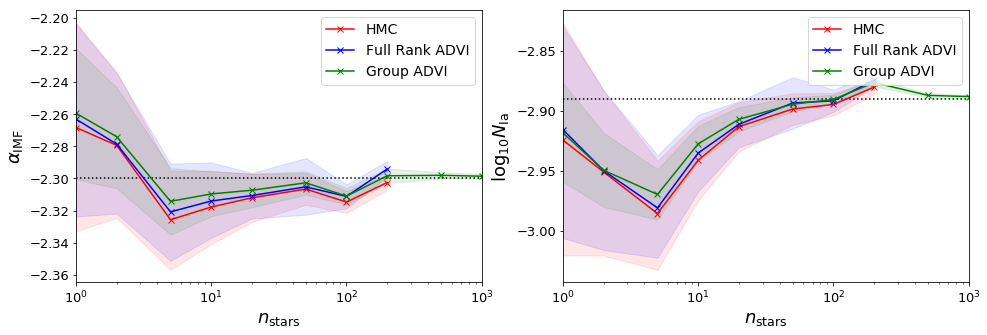

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [71]:
advi=reader('ADVI',min_n=2,max_n=2)
hmc=reader('HMC',max_n=1)
gr_ad=reader('GroupADVI',max_n=1)
hmc_big=reader('BigHMC')
gr_big=reader('BigGroupADVI')
advi_big=reader('BigADVI')

all_hmc=[];all_group=[];all_advi=[]
for i in range(len(hmc)):
    all_hmc.append(np.concatenate([hmc[i],hmc_big[i]]))
    all_group.append(np.concatenate([gr_ad[i],gr_big[i]]))
    all_advi.append(np.concatenate([advi[i],advi_big[i]]))

fields=[all_hmc,all_advi,all_group]#,gr_ad,mf_ad]
field_labels=['HMC','Full Rank ADVI','Group ADVI','MF-ADVI']
labels=[r'$\alpha_\mathrm{IMF}$',r'$\log_{10}N_\mathrm{Ia}$']
c=['r','b','g','c']

fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(16,5));

for ind in [0,1]:
    plt.figure()
    for f,field in enumerate(fields[:3]):
        ax[ind].fill_between(field[0],field[ind+1][:,0],field[ind+1][:,2],alpha=0.1,color=c[f])
        ax[ind].errorbar(field[0],field[ind+1][:,1],marker='x',label=field_labels[f],c=c[f]);
    ax[ind].hlines(true[ind],min(all_group[0]),max(all_group[0]),linestyles=':')
    ax[ind].legend(fontsize=FS-2,loc='upper right')
    ax[ind].set_ylabel(labels[ind],fontsize=FS+2)
    ax[ind].set_xlabel(r'$n_\mathrm{stars}$',fontsize=FS+2)
    ax[ind].set_xscale('log');
    for label in (ax[ind].get_xticklabels()+ax[ind].get_yticklabels()):
        label.set_fontsize(fontsize=FS-3)
    ax[ind].set_xlim([1,1000]);
import os
os.chdir('/home/oliverphilcox/ChempyMulti')
fig.savefig('Plots/MockComparison.pdf',bbox_inches='tight')#plt.title('Mock Data with %d%% Error'%error)

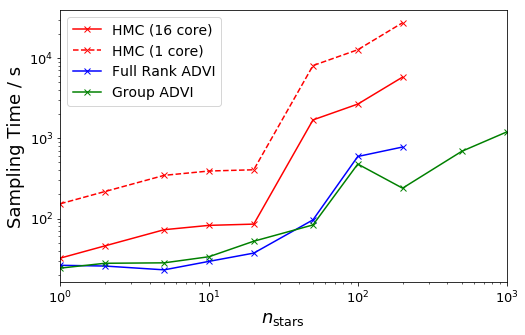

In [72]:
# advi=reader('ADVI',max_n=1)
# hmc=reader('BigHMC',max_n=1)
# gr_ad=reader('GroupADVI',max_n=1)
#advi_big=reader('BigADVI')

#all_advi=[]
#for i in range(len(ad)):
#     all_advi.append(np.concatenate([ad[i],advi_big[i]]))

fields=[all_hmc,all_hmc,all_advi,all_group]#,gr_ad,mf_ad]
field_labels=['HMC (16 core)','HMC (1 core)','Full Rank ADVI','Group ADVI','MF-ADVI']
labels=[r'$\alpha_\mathrm{IMF}$',r'$\log_{10}N_\mathrm{Ia}$']
c=['r','r','b','g','c']
factor = [1,19/4,1,1,1]
ls=['-','--','-','-']
plt.figure(figsize=(8,5))
for f,field in enumerate(fields[:4]):
    plt.errorbar(field[0],factor[f]*field[3],marker='x',label=field_labels[f],c=c[f],ls=ls[f]);
plt.legend(fontsize=FS-2,loc='upper left')
plt.ylabel('Sampling Time / s',fontsize=FS+2)
plt.xlabel(r'$n_\mathrm{stars}$',fontsize=FS+2)
plt.xscale('log');
plt.yscale('log');
plt.xlim([1,1000]);
plt.yticks(fontsize=FS-3);plt.xticks(fontsize=FS-3);
plt.savefig('Plots/MockComparisonTimes.pdf',bbox_inches='tight')#plt.title('Mock Data with %d%% Error'%error)

## Now create the corner plot for the 100 star HMC run:

In [8]:
el_names = ['C','Fe','He','Mg','N','Ne','O','Si'] # TNG elements
err_names = []
for el in el_names:
    err_names.append(r'$\sigma_\mathrm{%s}$'%el)

In [9]:
import os
os.chdir('/home/oliverphilcox/ChempyMulti')
from Chempy.parameter import ModelParameters
a=ModelParameters()

(-2.5, -2.1)

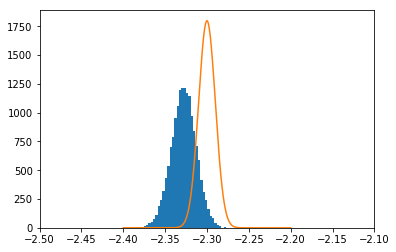

In [23]:
xi=0
ct,x,=np.histogram(Lambdas[:,0],bins=40)
integ=np.sum(np.diff(x)*ct)
plt.hist(Lambdas[:,0],density=False,bins=40)
prior_widths[0]=0.01
xdata=np.linspace(priors[xi]-10*prior_widths[xi],priors[xi]+10*prior_widths[xi],1000)
ydata=norm.pdf(xdata,loc=priors[xi],scale=prior_widths[xi])#,c='r',alpha=0.5)
ydata=norm.pdf(xdata,loc=priors[xi],scale=prior_widths[xi])#,c='r',alpha=0.5)
plt.plot(xdata,integ*ydata)
plt.xlim([-2.5,-2.1])

In [45]:
err_names

['$\\sigma_\\mathrm{C}$',
 '$\\sigma_\\mathrm{Fe}$',
 '$\\sigma_\\mathrm{He}$',
 '$\\sigma_\\mathrm{Mg}$',
 '$\\sigma_\\mathrm{N}$',
 '$\\sigma_\\mathrm{Ne}$',
 '$\\sigma_\\mathrm{O}$',
 '$\\sigma_\\mathrm{Si}$']

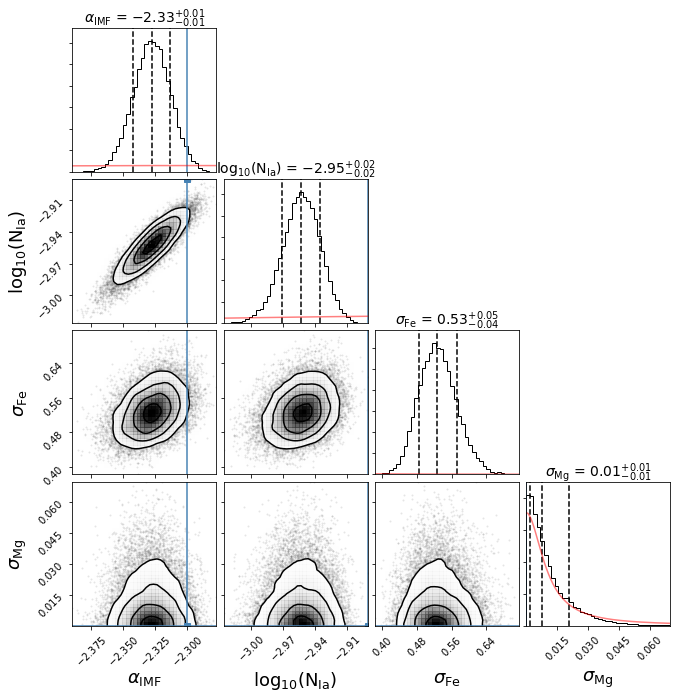

In [48]:
hmc_100 = np.load('/mnt/store1/oliverphilcox/ChempyMultiData/TNG_Abun/TNGResults/CornerHMC_1.npz')
Lambdas = hmc_100.f.Lambdas[0]#[-2]#[:100]
Errors = hmc_100.f.Errors[0]#[:100]
all_dat = np.hstack([Lambdas,Errors[:,[1,3]]])
true_params = [-2.3,-2.89,0,0]#,0,0,0,0,0,0]
n_bins = 40
priors = a.p0[:2]
prior_widths = [0.3,0.3]
names = [r'$\alpha_\mathrm{IMF}$',r'$\log_{10}(\mathrm{N}_\mathrm{Ia})$']+[err_names[1],err_names[3]]
import corner
figure=corner.corner(all_dat,show_titles=True,quantiles=[0.15865,0.5,0.84135],truths=true_params,
                     use_math_text=True,label_kwargs={'fontsize': 18},title_kwargs={'fontsize':14},
                     labels=names,bins=n_bins,scale_hist=False,smooth=1.);

integ=np.zeros(len(all_dat[0]))
for i in range(len(all_dat[0])):
    ct,x,=np.histogram(all_dat[:,i],bins=n_bins)
    integ[i]=np.sum(np.diff(x)*ct)


from matplotlib.patches import Ellipse

# Extract the axes
ndim=len(names)
axes = np.array(figure.axes).reshape((ndim, ndim))

from scipy.stats import norm,halfcauchy

for yi in range(ndim):
    xi=yi
    ax=axes[yi,xi]
    if yi>1:
        xdata=np.linspace(0,1,1000)
        ax.plot(xdata,integ[yi]*halfcauchy.pdf(xdata,loc=0,scale=0.01),c='r',alpha=0.5)
    else:
        xdata=np.linspace(priors[xi]-10*prior_widths[xi],priors[xi]+10*prior_widths[xi],1000)
        ax.plot(xdata,integ[yi]*norm.pdf(xdata,loc=priors[xi],scale=prior_widths[xi]),c='r',alpha=0.5)

# Loop over the histograms
for yi in range(2):
    for xi in range(yi):
        ax = axes[yi, xi]
        el=Ellipse([priors[xi],priors[yi]],2*prior_widths[xi],2*prior_widths[yi],
                   facecolor='none',edgecolor='r', lw=2,alpha=0.5)
        el2=Ellipse([priors[xi],priors[yi]],4*prior_widths[xi],4*prior_widths[yi],
                   facecolor='none',edgecolor='r', lw=2,alpha=0.5,ls='--')
        ax.add_artist(el)
        ax.add_artist(el2)
figure.savefig('Plots/TNG_HMC100_Corner.pdf',bbox_inches='tight')

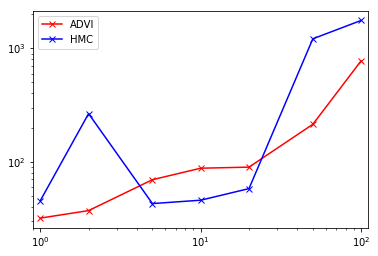

In [110]:
ad=reader('ADVI',1)
hmc=reader('HMC',1)
plt.errorbar(ad[0],ad[3],label='ADVI',marker='x',c='r')
plt.errorbar(hmc[0],hmc[3],label='HMC',marker='x',c='b')
plt.yscale('log');plt.xscale('log');
plt.xlim([0.9*min(ad[0]),1.1*max(ad[0])])
plt.legend()

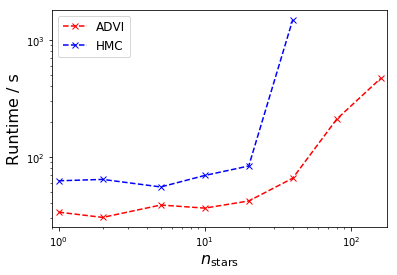

In [42]:
ad=reader('ADVI')
hmc=reader('HMC')
plt.errorbar(ad[0],ad[3],label='ADVI',marker='x',c='r',ls='--')
plt.errorbar(hmc[0],hmc[3],label='HMC',marker='x',c='b',ls='--')
plt.yscale('log');plt.xscale('log');plt.xlim([0.9*min(ad[0]),1.1*max(ad[0])])
plt.legend(fontsize=FS-4,loc='upper left');plt.ylabel('Runtime / s',fontsize=FS);
plt.xlabel(r'$n_\mathrm{stars}$',fontsize=FS);
plt.savefig('../../Plots/TNGRuntimeComparison')